In [1]:
import os

try:
    snakemake
except NameError:
    from snakemk_util import load_rule_args
    
    os.chdir('../..')
    
    snakemake = load_rule_args(
        snakefile = os.getcwd() + "/workflow/Snakefile",
        rule_name = 'replication_rate_tss',
        root = '..',
        default_wildcards={'sample': 'K562'}
    )

In [2]:
from lapa.result import LapaTssResult
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [308]:
df_lr = snakemake.params['df_lr']

In [309]:
len(df_lr['sample'].unique())

50

In [4]:
lapa = LapaTssResult(snakemake.input['lapa_dir'], replicated=False)

In [306]:
_df = df_lr[['Technical replicate(s)', 'sample', 'Experiment accession']]

In [307]:
_df[_df['sample'] == 'GM12878']

,Technical replicate(s),sample,Experiment accession
File accession,,,
ENCFF596ODX,2_1,GM12878,ENCSR706ANY
ENCFF192PJS,1_1,GM12878,ENCSR706ANY
ENCFF694CBG,3_1,GM12878,ENCSR706ANY
ENCFF538BNH,4_1,GM12878,ENCSR706ANY
ENCFF648NAR,1_1,GM12878,ENCSR838WFC
ENCFF225CCJ,2_1,GM12878,ENCSR838WFC


In [305]:
df_lr.columns

Index(['Experiment accession', 'File format', 'File type', 'File format type',
       'Output type', 'File assembly', 'Assay', 'Donor(s)',
       'Biosample term id', 'Biosample term name', 'Biosample type',
       'Biosample organism', 'Biosample treatments',
       'Biosample treatments amount', 'Biosample treatments duration',
       'Biosample genetic modifications methods',
       'Biosample genetic modifications categories',
       'Biosample genetic modifications targets',
       'Biosample genetic modifications gene targets',
       'Biosample genetic modifications site coordinates',
       'Biosample genetic modifications zygosity', 'Experiment target',
       'Library made from', 'Library depleted in', 'Library extraction method',
       'Library lysis method', 'Library crosslinking method',
       'Library strand specific', 'Experiment date released', 'Project',
       'RBNS protein concentration', 'Library fragmentation method',
       'Library size range', 'Biological repl

In [274]:
exp_count = df_lr.groupby('Experiment accession').size()
exp_count = exp_count[exp_count > 1]

In [275]:
df_lr = df_lr[df_lr['Experiment accession'].isin(exp_count.index)]

In [276]:
len(df_lr['sample'].unique())

34

  0%|          | 0/34 [00:00<?, ?it/s]

(0.0, 40000.0)

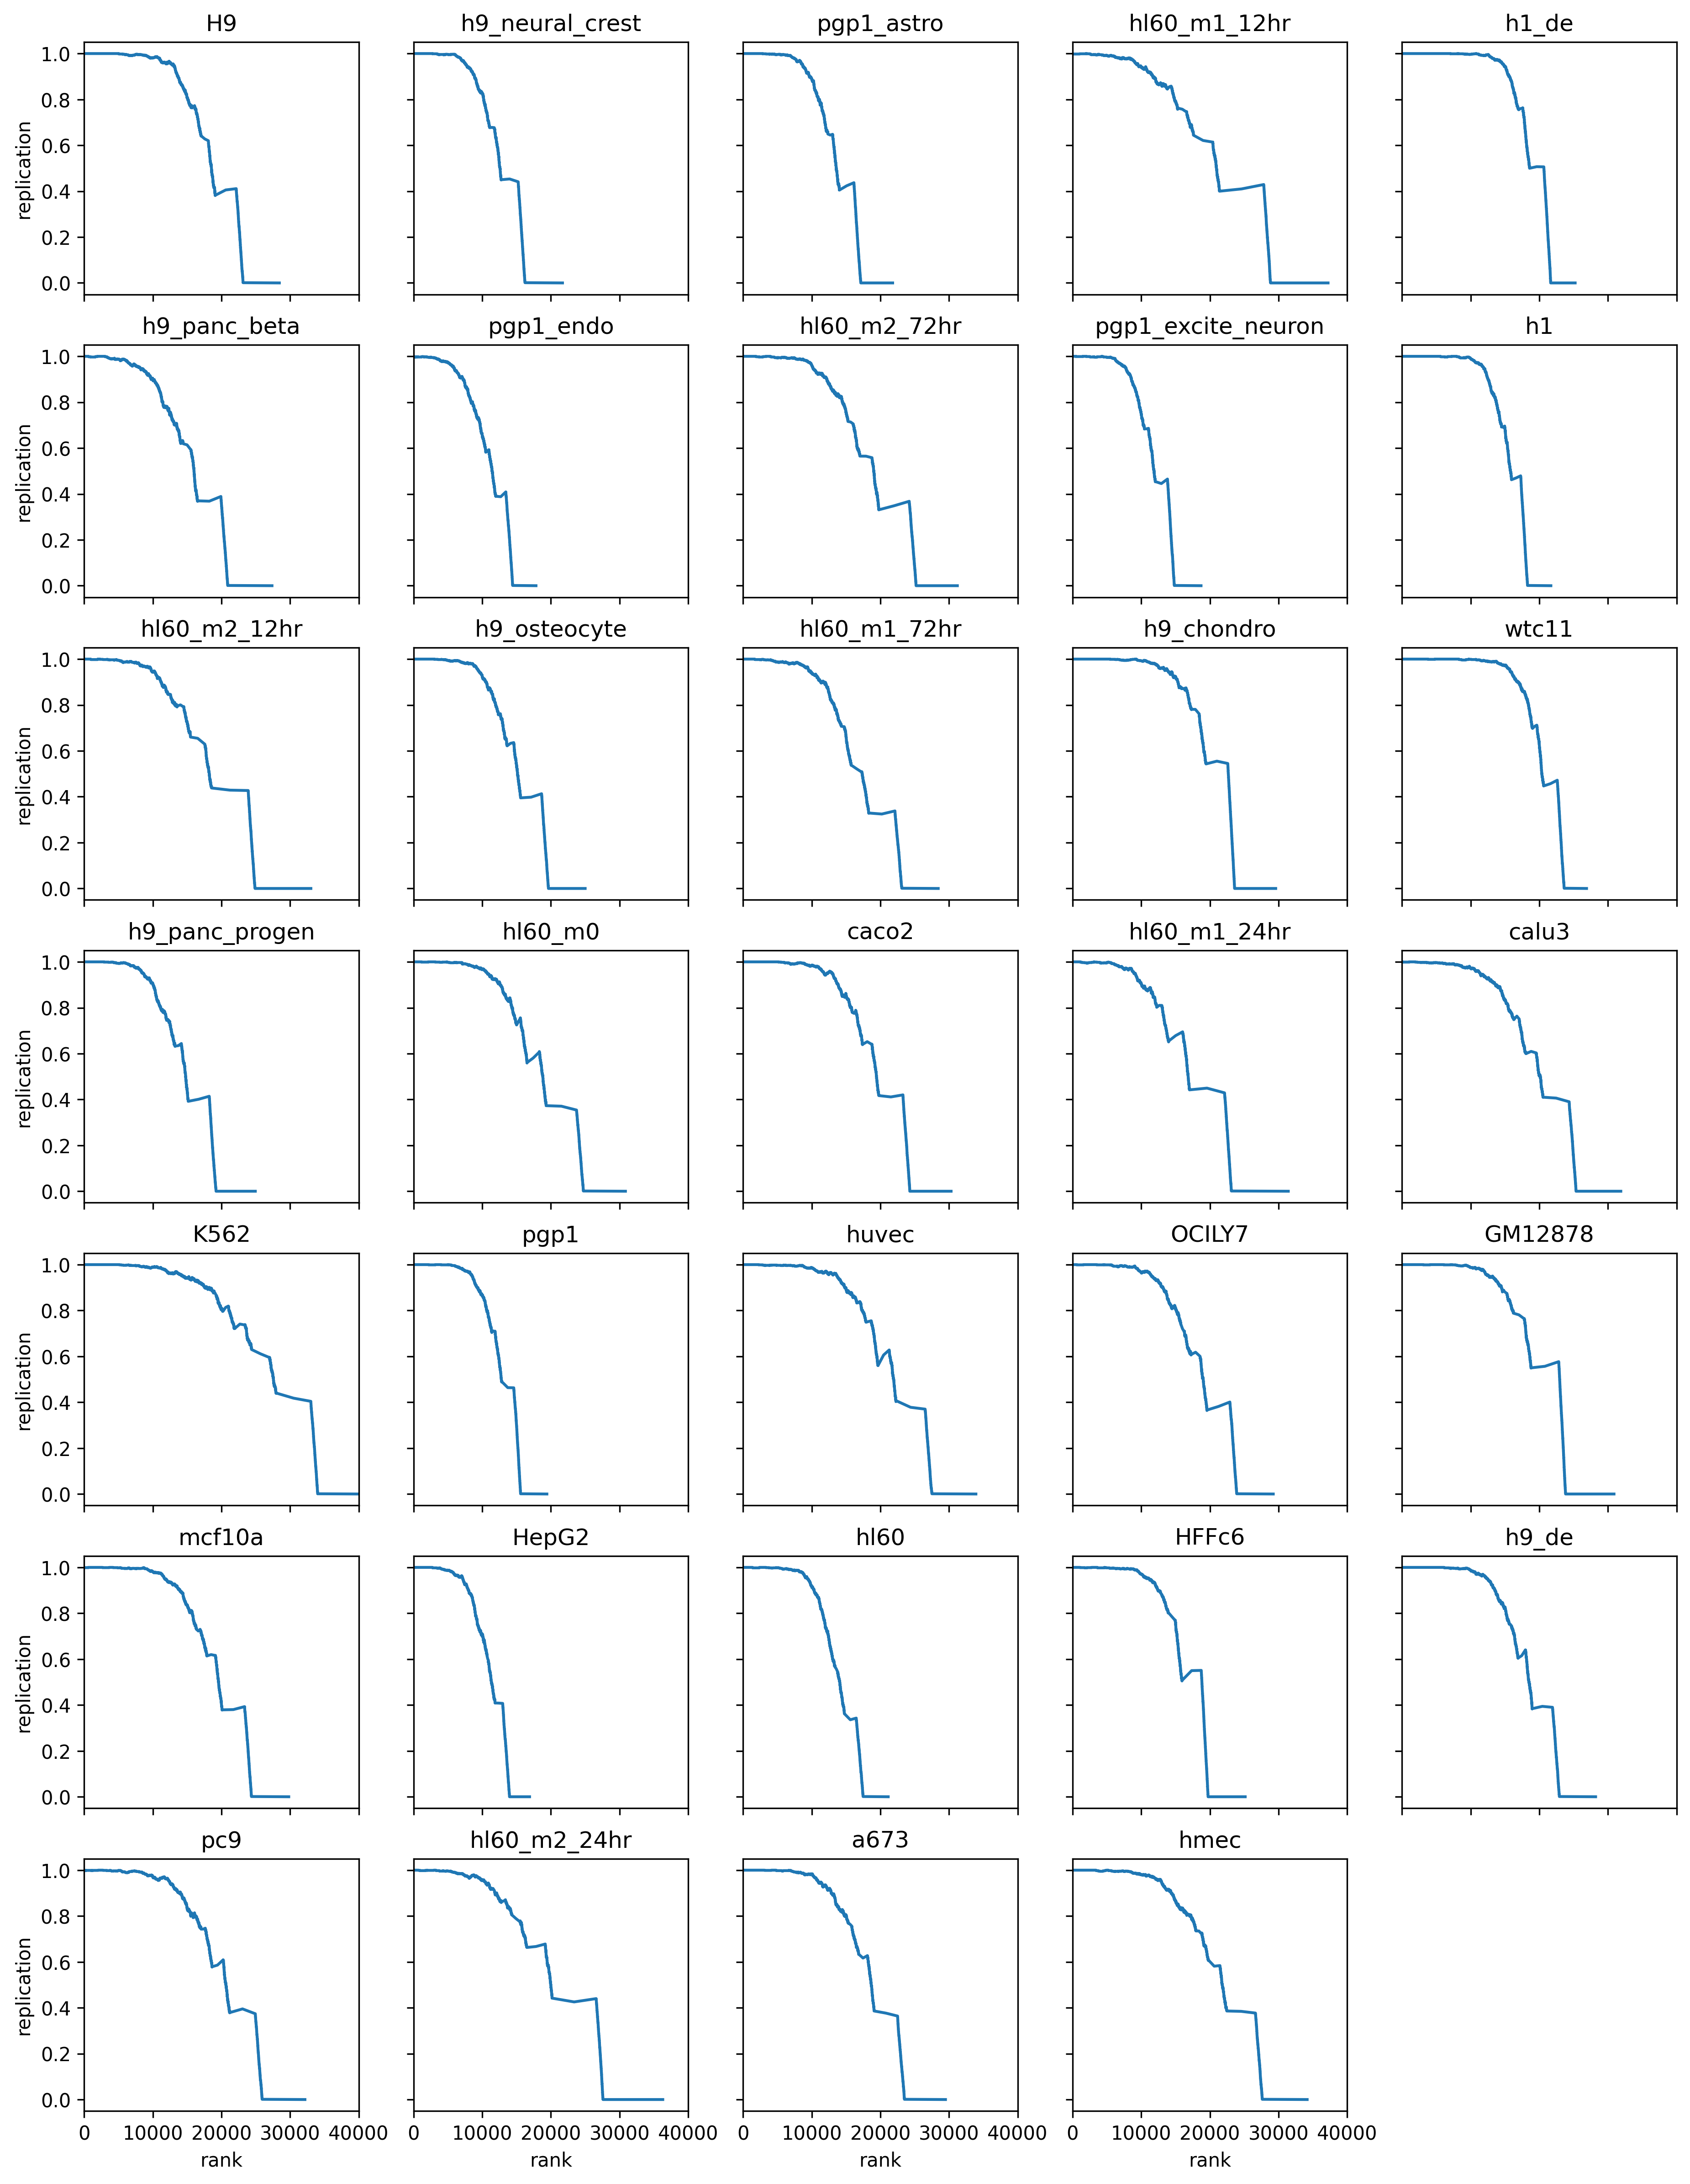

In [278]:
from more_itertools import flatten

n = 0

fig, axs = plt.subplots(7, 5, dpi=300, figsize=(15, 20), sharex=True, sharey=True)
axs = list(flatten(axs))

for ax in axs:
    ax.set_axis_off()

for sample in tqdm(df_lr['sample'].unique()):
    samples = df_lr[df_lr['sample'] == sample].index.tolist()
    
    if len(samples) < 2:
        continue

    lapa.plot_replication_rate(samples=samples, line_kws={'ax': axs[n]})
    axs[n].set_title(sample)
    axs[n].set_axis_on()

    n += 1

plt.xlim((0, 40_000))

In [282]:
lapa

In [289]:
lapa = LapaTssResult(snakemake.input['lapa_dir'], replicated=False)

In [293]:
cutoffs = list()

for sample in tqdm(df_lr['Experiment accession'].unique()):
    samples = df_lr[df_lr['Experiment accession'] == sample].index.tolist()

    df = lapa.replication_rate(samples=samples)
    df = df[df['replication'] > 0.95]
    
    print(sample, df['score'].min())
    cutoffs.append(df['score'].min())

  0%|          | 0/36 [00:00<?, ?it/s]

ENCSR044ARQ 7.647
ENCSR056MYH 7.845
ENCSR071IHY 7.718
ENCSR121FDE 10.008
ENCSR127HKN 5.558
ENCSR130CIK 14.662
ENCSR148IIG 11.425
ENCSR159ICU 11.246
ENCSR257JBF 6.393
ENCSR271KEJ 6.789
ENCSR278ZPI 7.773
ENCSR296PQZ 8.575
ENCSR398SKD 12.137
ENCSR470HYQ 6.356
ENCSR507JOF 7.311
ENCSR530BOC 10.316
ENCSR546DFO 9.566
ENCSR580IDG 7.348
ENCSR583KAF 7.391
ENCSR583KCB 10.793
ENCSR589FUJ 7.738
ENCSR676IWT 6.442
ENCSR687RWI 8.742
ENCSR700SUP 9.977
ENCSR706ANY 4.558
ENCSR813UIT 11.182
ENCSR834DQL 8.944
ENCSR838WFC 11.03
ENCSR887LTD 12.287
ENCSR902GAF 6.046
ENCSR904KAT 8.822
ENCSR916JDV 9.902
ENCSR930GRQ 7.397
ENCSR983KDL 12.814
ENCSR989ZYL 10.724
ENCSR998KIZ 10.193


In [296]:
import numpy as np

np.mean(cutoffs)

8.990416666666667

In [252]:
samples

['ENCFF583MSU', 'ENCFF984RMR', 'ENCFF644PGG']

<AxesSubplot:xlabel='rank', ylabel='replication'>

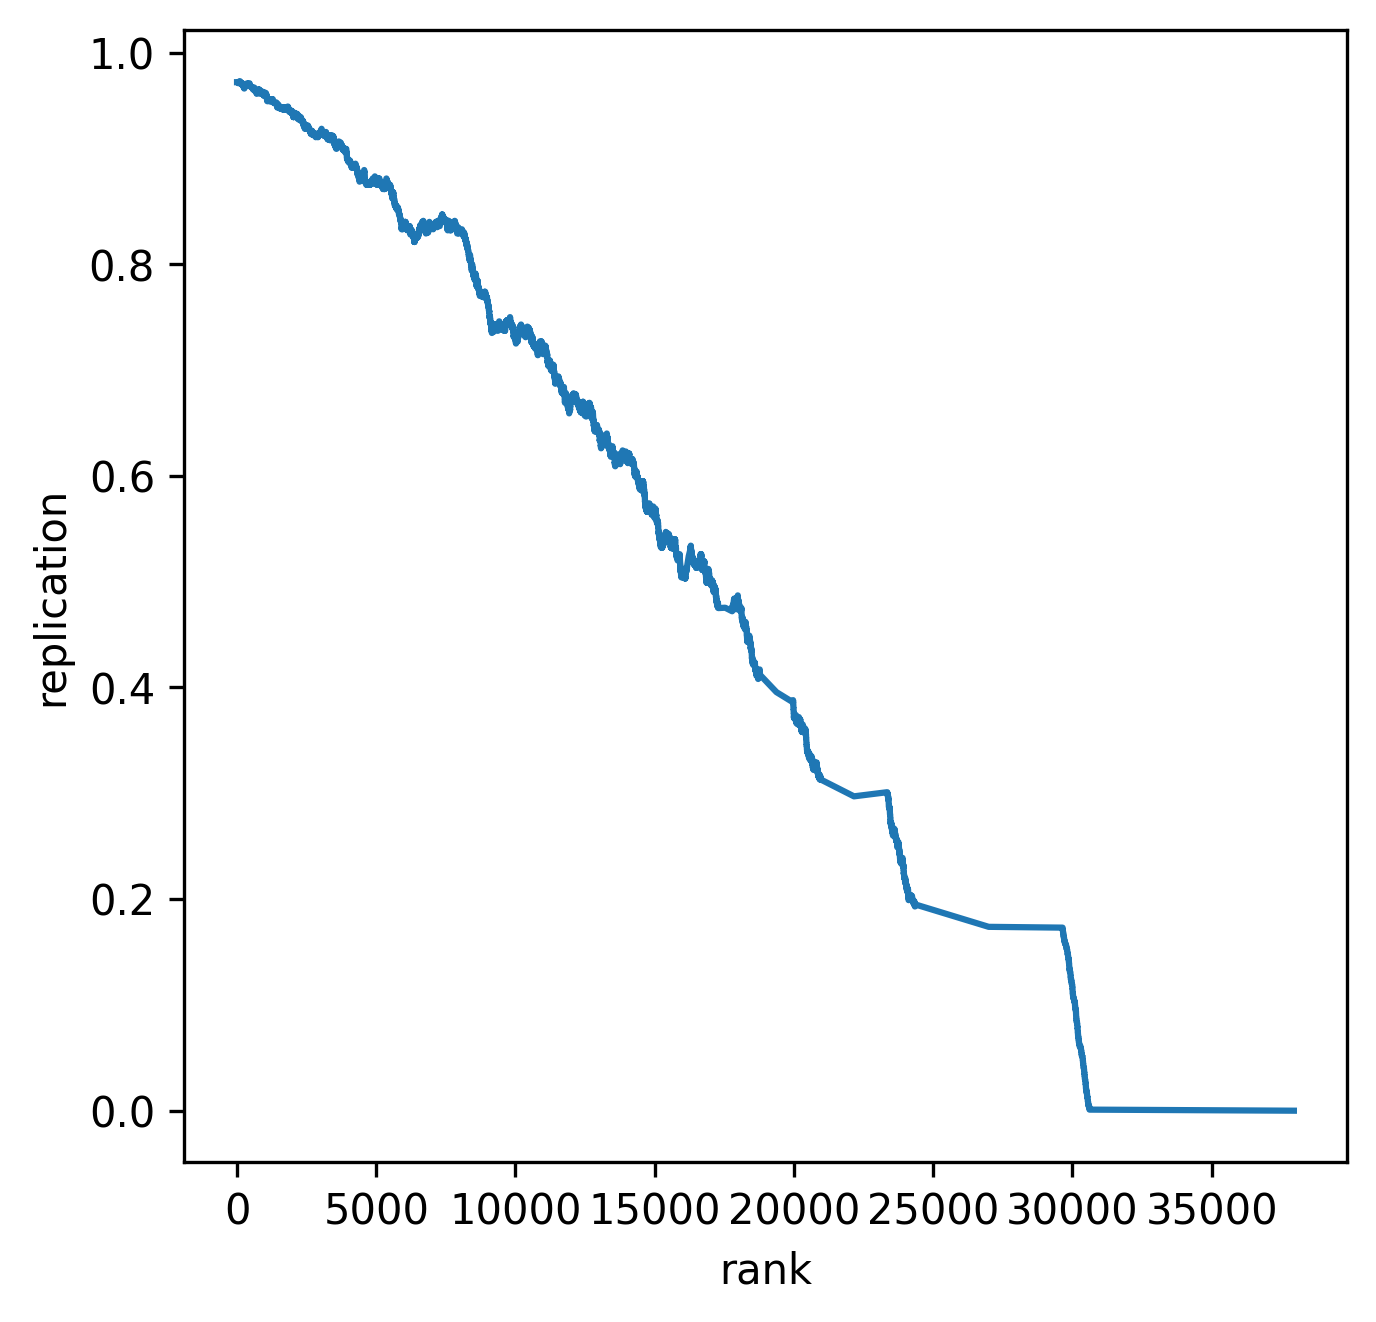

In [255]:
plt.figure(figsize=(5, 5), dpi=300)

lapa.plot_replication_rate(samples=['ENCFF583MSU', 'ENCFF984RMR'])

In [112]:
samples = df_lr[df_lr['sample'] == 'GM12878'].index.tolist()

In [113]:
samples

['ENCFF596ODX',
 'ENCFF192PJS',
 'ENCFF694CBG',
 'ENCFF538BNH',
 'ENCFF648NAR',
 'ENCFF225CCJ',
 'ENCFF219UJG']

<AxesSubplot:xlabel='rank', ylabel='replication'>

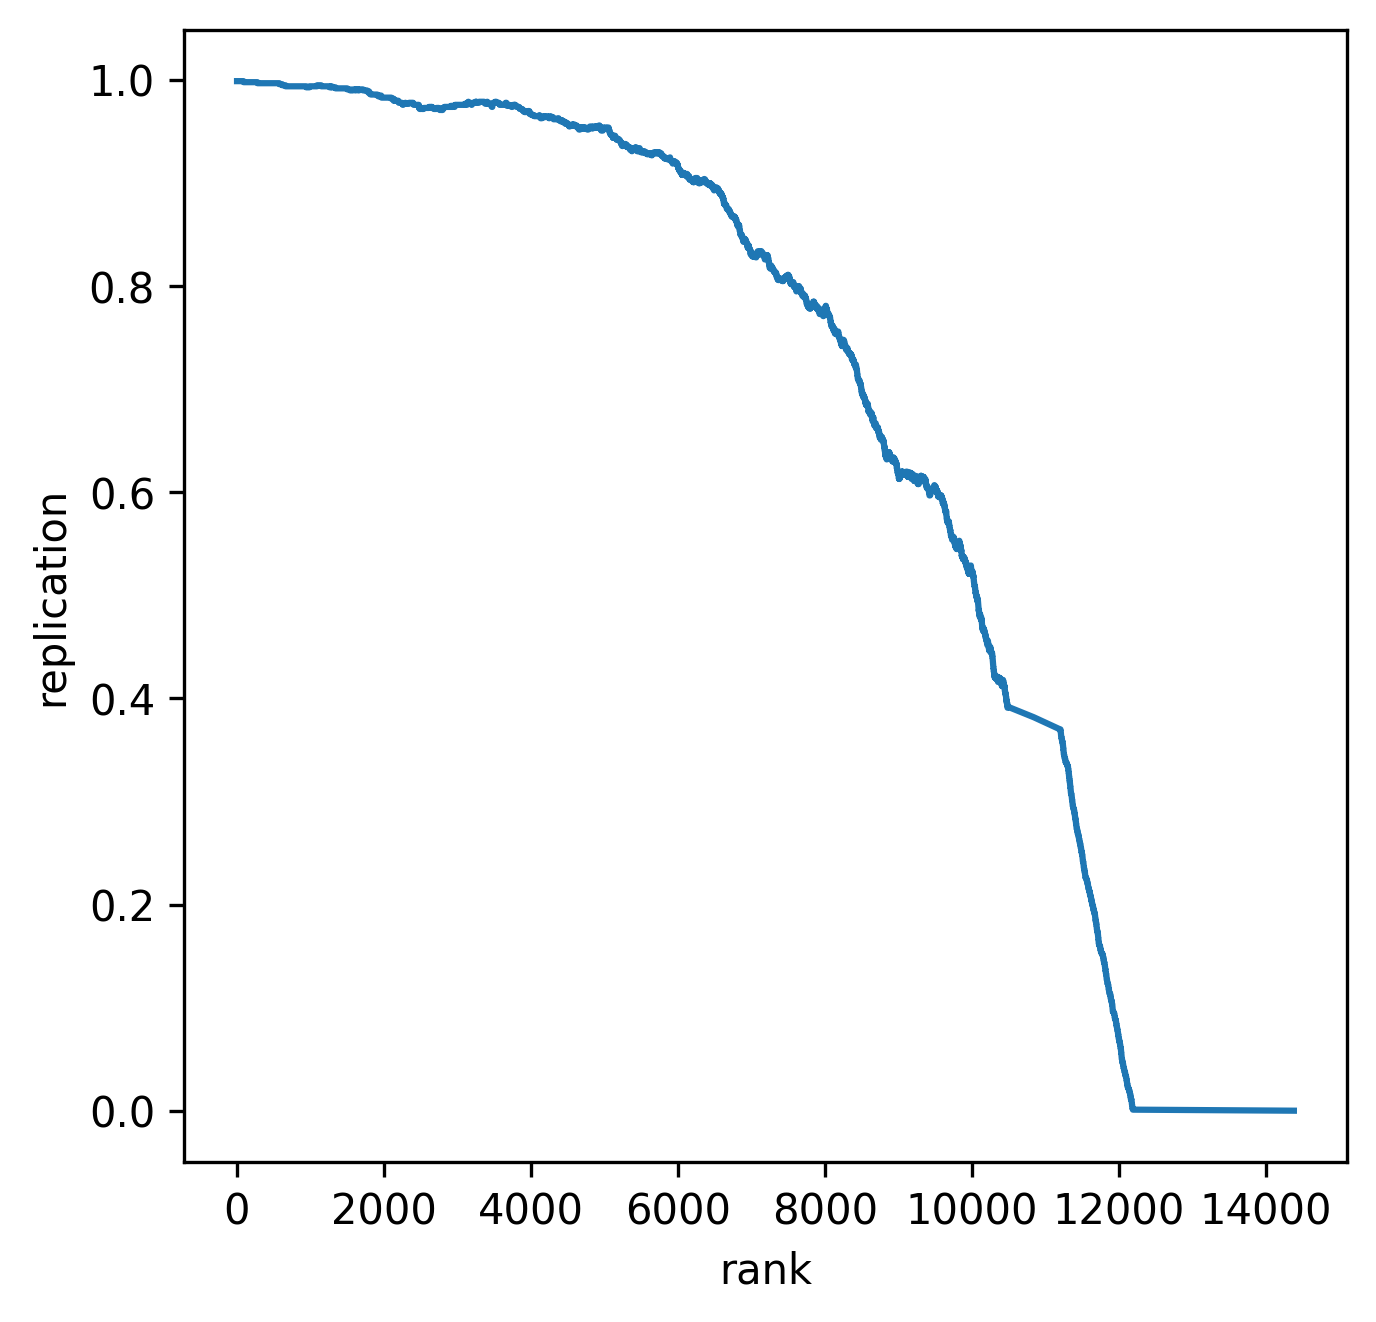

In [211]:
plt.figure(figsize=(5, 5), dpi=300)

lapa.plot_replication_rate(samples=['ENCFF596ODX', 'ENCFF538BNH'])

<AxesSubplot:xlabel='rank', ylabel='replication'>

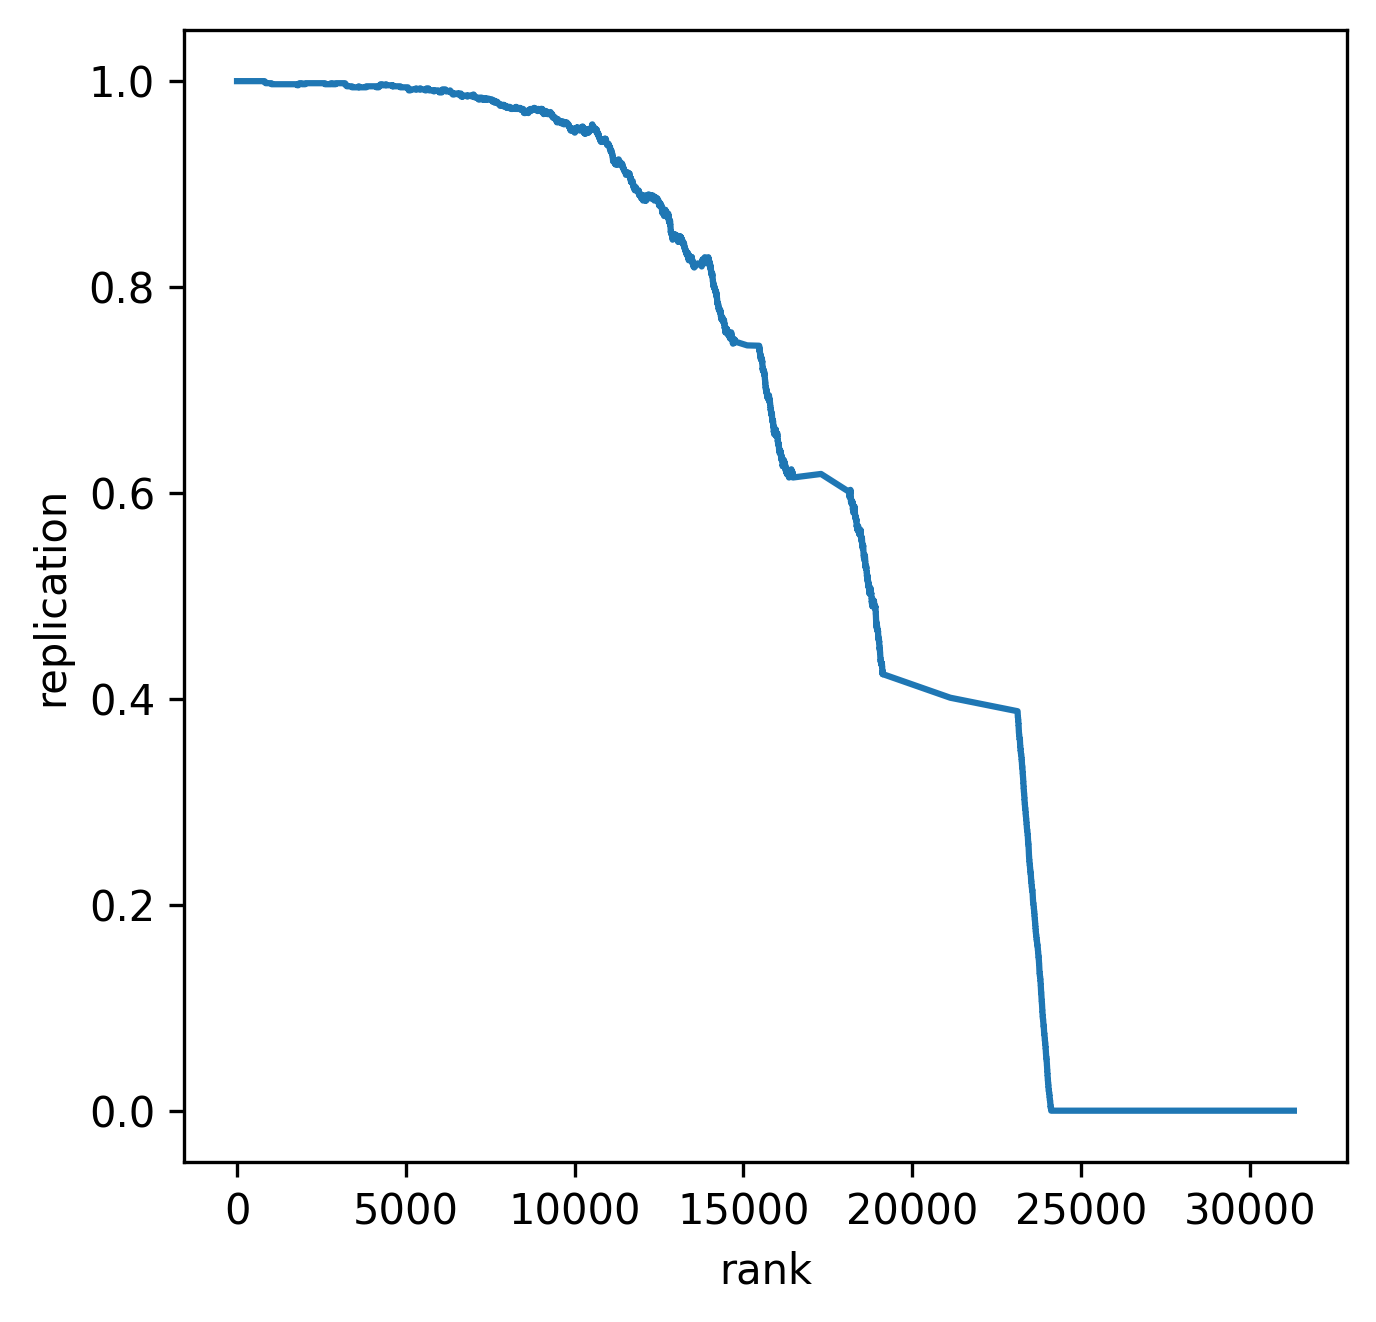

In [214]:
plt.figure(figsize=(5, 5), dpi=300)

lapa.plot_replication_rate(samples=['ENCFF623IBV', 'ENCFF502LAB'])

In [110]:
df_count = lapa.read_counts()

In [114]:
df_counts = df_counts[samples]ENCFF219UJG

In [128]:
df_counts = df_counts[(df_counts > 0).any(axis=1)]

In [192]:
_df = df_counts[(df_counts > 50).any(axis=1)]

In [193]:
_df

,ENCFF596ODX,ENCFF192PJS,ENCFF694CBG,ENCFF538BNH,ENCFF648NAR,ENCFF225CCJ,ENCFF219UJG
site,,,,,,,
chr10:100229572:-,15.0,8.0,1.0,0.0,0.0,1.0,51.0
chr10:100267646:-,16.0,9.0,15.0,13.0,63.0,74.0,41.0
chr10:100286679:-,61.0,31.0,28.0,38.0,154.0,272.0,59.0
chr10:100529879:-,147.0,104.0,157.0,204.0,335.0,306.0,218.0
chr10:100535942:+,27.0,16.0,17.0,18.0,53.0,31.0,83.0
...,...,...,...,...,...,...,...
chrX:77899479:+,186.0,233.0,306.0,290.0,198.0,340.0,165.0
chrX:78104247:+,1160.0,1116.0,963.0,1177.0,7816.0,10489.0,1939.0
chrX:78945404:+,20.0,31.0,12.0,21.0,196.0,268.0,47.0


-5.491427034337308

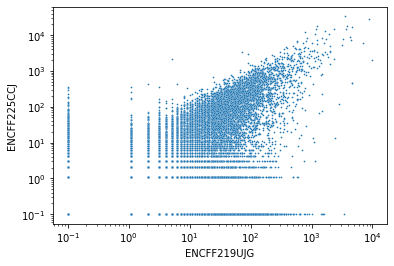

In [217]:
sns.scatterplot(data=df_counts + 0.1, x='ENCFF219UJG', y='ENCFF225CCJ', s=3)
plt.xscale('log')
plt.yscale('log')

r2_score(df_counts['ENCFF219UJG'], df_counts['ENCFF225CCJ'])

0.9078621895846857

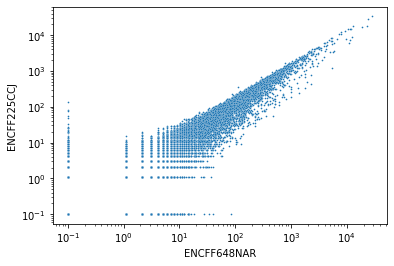

In [216]:
from scipy.stats import pearsonr

sns.scatterplot(data=df_counts + 0.1, x='ENCFF648NAR', y='ENCFF225CCJ', s=3)
plt.xscale('log')
plt.yscale('log')

r2_score(df_counts['ENCFF648NAR'], df_counts['ENCFF225CCJ'])

-3.463483445331498

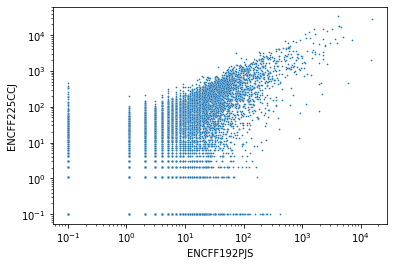

In [215]:
from sklearn.metrics import r2_score

sns.scatterplot(data=df_counts + 0.1, x='ENCFF192PJS', y='ENCFF225CCJ', s=3)
plt.xscale('log')
plt.yscale('log')

r2_score(df_counts['ENCFF192PJS'], df_counts['ENCFF225CCJ'])

In [233]:
import pandas as pd

_df_rep = list() 

for i in ['ENCFF596ODX', 'ENCFF225CCJ', 'ENCFF219UJG']:
    _df = df_counts[['ENCFF596ODX', 'ENCFF225CCJ', 'ENCFF219UJG']]
    _df = _df[_df[i] > 10]
    
    _df_rep.append([i, _df[(_df.sum(axis=1) - _df[i]) == 0].shape[0], _df.shape[0]])
    
_df_rep = pd.DataFrame(_df_rep, columns=['sample', 'not_replicated', 'num_tss'])

In [234]:
_df_rep['percentage'] = _df_rep['not_replicated'] / _df_rep['num_tss']

In [237]:
print(_df_rep.to_csv(sep='\t', index=False))

sample	not_replicated	num_tss	percentage
ENCFF596ODX	139	5115	0.027174975562072337
ENCFF225CCJ	263	7003	0.03755533342853063
ENCFF219UJG	1563	9292	0.1682092122255704

